In [1]:
# 앞으로 사용하게 될 라이브러리들을 모두 불러오기.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
from scipy import stat

from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

# train과 test 데이터 세트 불러오기.
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# train에서 상관계수가 0.5 이상인 피처들 추출하기.
corr_house = train.corr()
top_corr_features = corr_house.index[abs(corr_house["SalePrice"])>=0.5]
top_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [2]:
subset=train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
       
y = subset['SalePrice']
X = subset.drop(['SalePrice'], axis=1)

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(y, y_train_error)))

print("RMSE is {}".format(rmse))

RMSE is 37779.24578021317


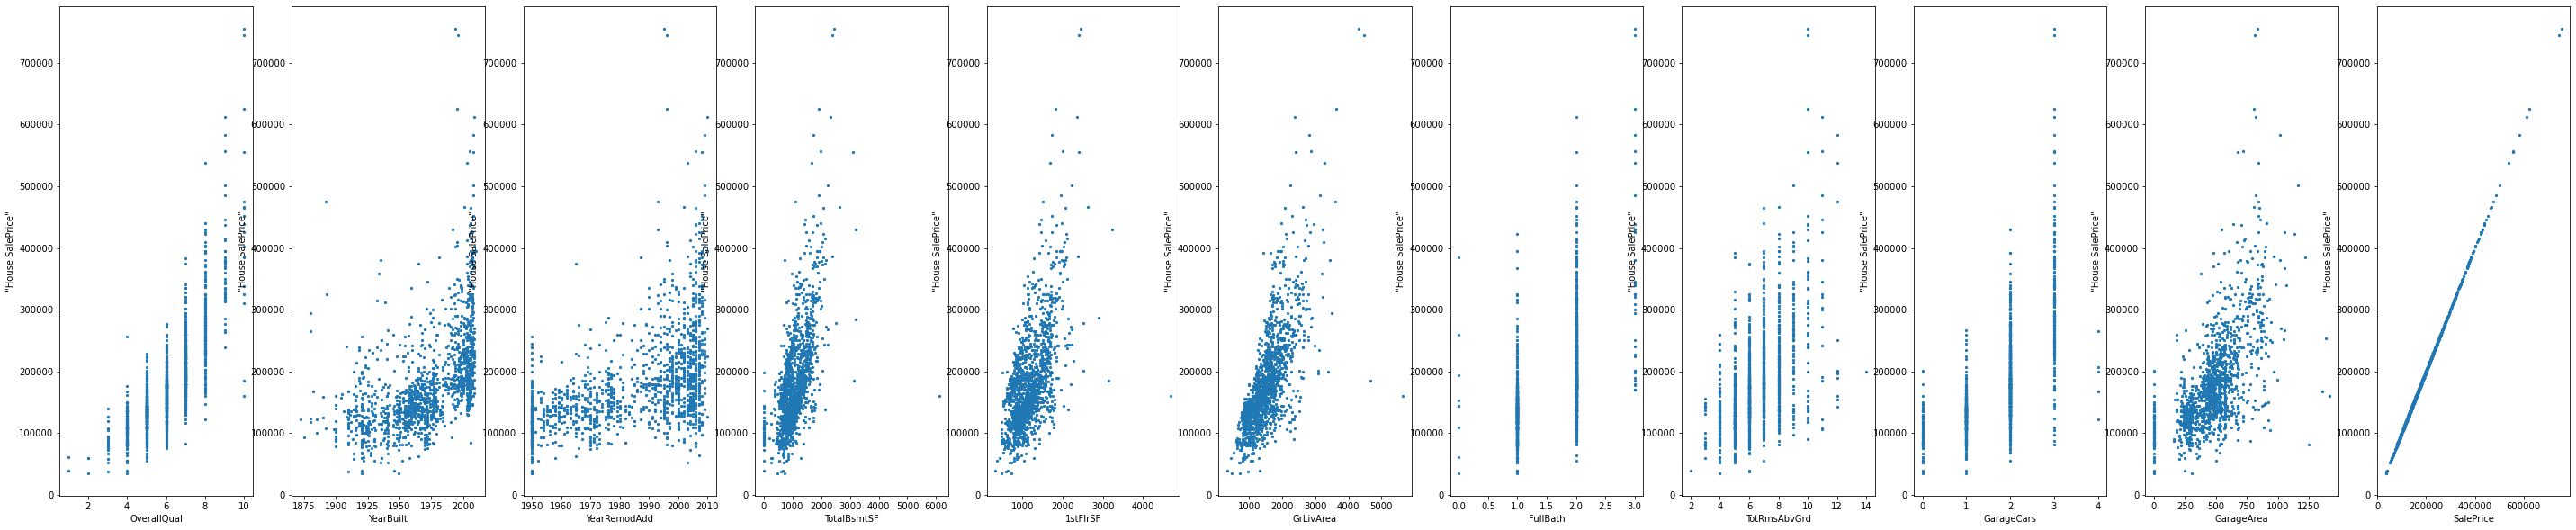

In [3]:
plt.figure(figsize=(50,10))
target = train['SalePrice']

for i, col in enumerate(top_corr_features):
    plt.subplot(1, len(top_corr_features), i+1)
    x = train[col]
    y = target
    plt.scatter(x,y,marker='o',s=5)
    plt.xlabel(col)
    plt.ylabel('"House SalePrice"')

In [4]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [5]:
train.sort_values(by = 'GarageArea', ascending = False)[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


In [6]:
# 아웃라이어 처리하기(1).
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [7]:
# 아웃라이어 처리하기(2)
train = train.drop(train[train['Id'] == 582].index)
train = train.drop(train[train['Id'] == 1191].index)
train = train.drop(train[train['Id'] == 1062].index)

In [8]:
subset=train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
       
y = subset['SalePrice']
X = subset.drop(['SalePrice'], axis=1)

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(y, y_train_error)))

print("RMSE is {}".format(rmse))

RMSE is 33552.9607780025


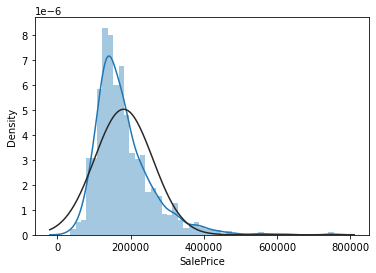

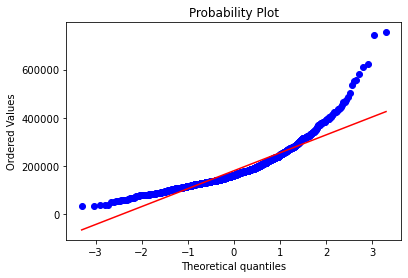

In [9]:
sns.distplot(train['SalePrice'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

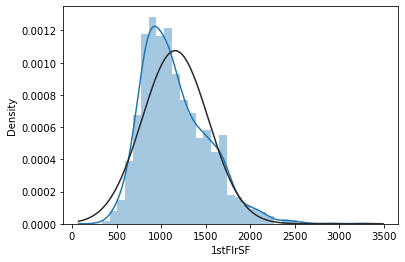

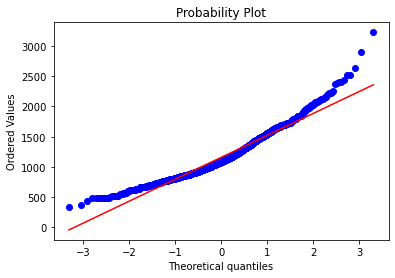

In [10]:
sns.distplot(train['1stFlrSF'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)
plt.show();

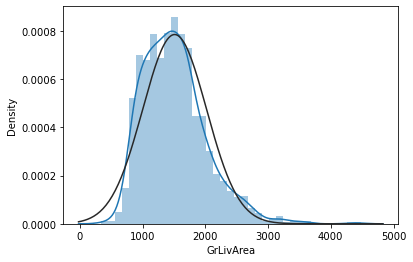

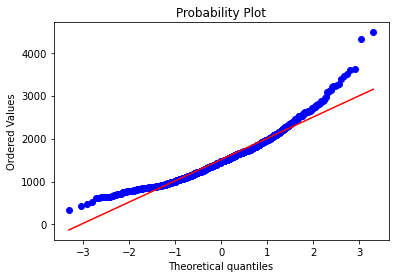

In [11]:
sns.distplot(train['GrLivArea'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show();

In [12]:
# 3가지 피처, 'SalePrice', '1stFlrSF', 'GrLivArea'에 대해
# log 스케일로 바꾼다.
train["SalePrice"] = np.log1p(train["SalePrice"])
#test["SalePrice"] = np.log1p(test["SalePrice"])

train["1stFlrSF"] = np.log1p(train["1stFlrSF"])
test["1stFlrSF"] = np.log1p(test["1stFlrSF"])

train["GrLivArea"] = np.log1p(train["GrLivArea"])
test["GrLivArea"] = np.log1p(test["GrLivArea"])

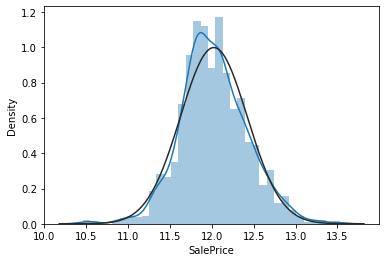

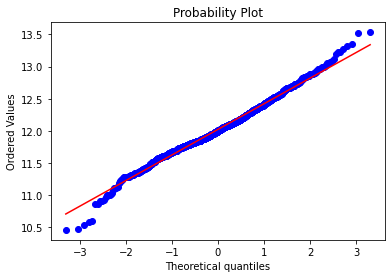

In [13]:
sns.distplot(train['SalePrice'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

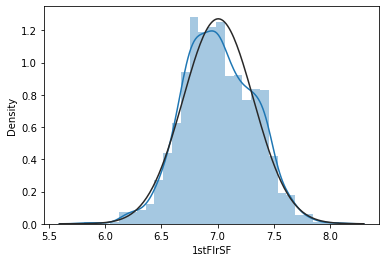

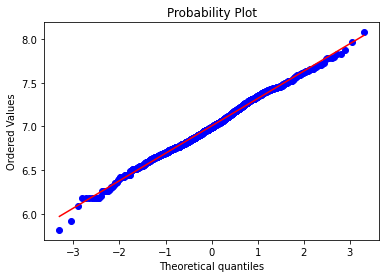

In [14]:
sns.distplot(train['1stFlrSF'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)
plt.show();

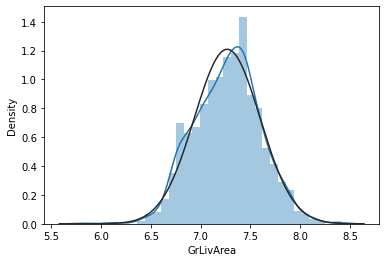

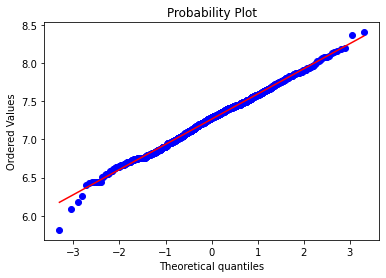

In [15]:
sns.distplot(train['GrLivArea'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show();

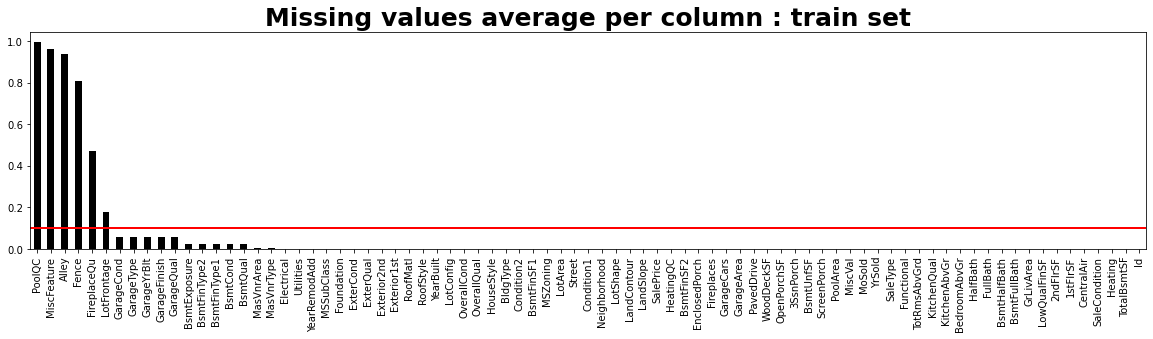

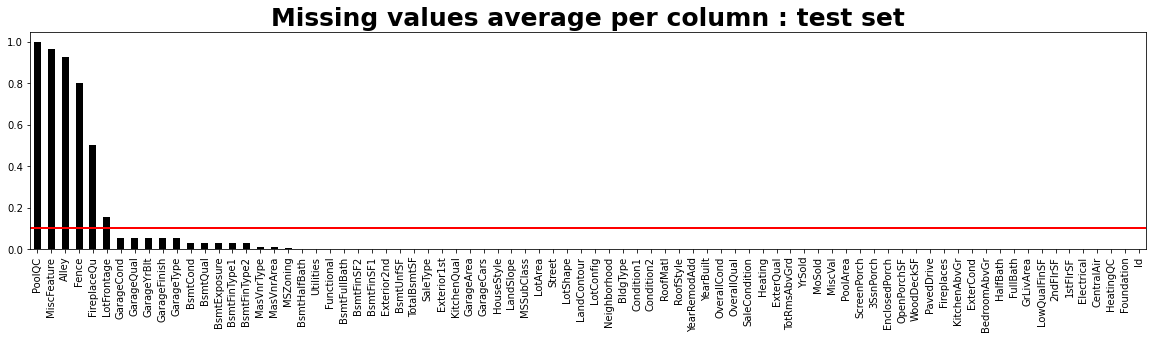

In [16]:
allna = (train.isnull().sum() / len(train))
#allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
allna = allna.sort_values(ascending=False)
plt.figure(figsize=(20, 4))
allna.plot.bar(color="black")
plt.title('Missing values average per column : train set', fontsize=25, weight='bold' )
plt.axhline(0.1, 0, 1, color='red', linestyle='solid', linewidth=2)
plt.show()

allna = (test.isnull().sum() / len(test))
#allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
allna = allna.sort_values(ascending=False)
plt.figure(figsize=(20, 4))
allna.plot.bar(color="black")
plt.title('Missing values average per column : test set', fontsize=25, weight='bold' )
plt.axhline(0.1, 0, 1, color='red', linestyle='solid', linewidth=2)
plt.show()

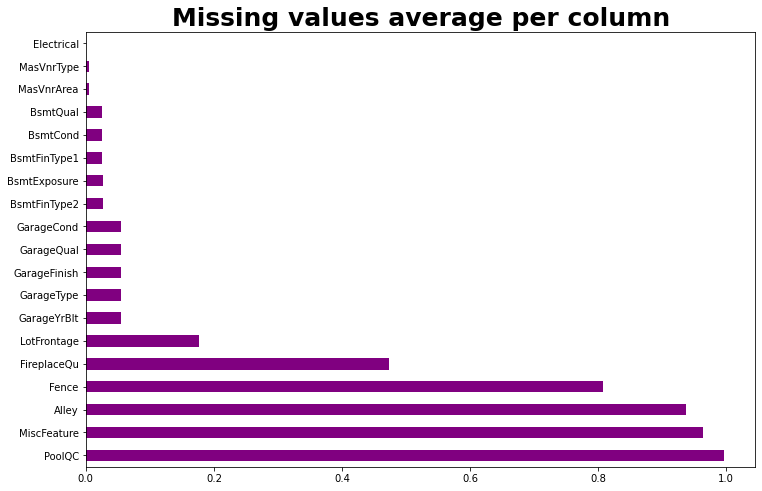

In [17]:
allna = (train.isnull().sum() / len(train))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

In [18]:
#nan 값 처리를 train과 test 파일에 걸쳐서 하기 위해 concat으로 합쳐준다.
# 이때 나중에 다시 나눠야하기 때문에 train의 길이를 저장한다.

# train 데이터의 행 개수 추출
len_train = train.shape[0]

# train과 test 데이터의 'SalePrice' 피처 추출
y_reg = train['SalePrice']

# test 데이터의 인덱스(1461부터 2919) 추출
Id = test['Id']

# train과 test 데이터 병합
df_all = pd.concat([train,test])

# train과 test 데이터에 있던 인덱스 제거
del df_all['Id']

In [19]:
# In these features, NAN means none
# nan 처리!

# 손실된 데이터가 너무 많은(몇 % 이상) 피처들을 아예 제거하기.
# (제거한 근거를 그래프로 제시하면 매우 좋겠음!)
df_all = df_all.drop(['PoolQC'], axis=1)
df_all = df_all.drop(['MiscFeature'], axis=1)
df_all = df_all.drop(['Fence'], axis=1)
df_all = df_all.drop(['FireplaceQu'], axis=1)
df_all = df_all.drop(['LotFrontage'], axis=1)

# 문자형 피처들의 손실된 데이터를 'None'으로 채우기 / 지하실, 차고가 NaN 보다는 없는 게 더 자연스러움
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all['BsmtQual'] = df_all['BsmtQual'].fillna('None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna('None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna('None')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('None')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('None')
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')

# 숫자형 피처들의 손실된 데이터를 0으로 채우기 / 지하실, 차고가 NaN 보다는 없는 게 더 자연스러움
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(0)
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(0)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(0)
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['GarageCars'] = df_all['GarageCars'].fillna(0)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0)

# 당연히 있어야 하는 손실된 데이터를 평균값(?)으로 채우기
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['MasVnrType'] = df_all['MasVnrType'].fillna(df_all['MasVnrType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [20]:
# One Hot Encoding을 하기위해 라이브러리를 불러오기.
# from sklearn.preprocessing import OneHotEncoder

# train과 test 데이터를 합친 df_all을 one_hot_encoding으로 복사하기.
one_hot_encoding = df_all.copy()

# 'get_dumies' 함수로 새로운 피처들 생성
# 이 때, 함수 'get_dumies'는 벡터라이즈이다.
# 한편, one hot encoding은 사용하지 않았다.(라이브러리 불러놓고 다른 함수 씀)
# get_dumies와 one hot encoding는 동일한 원리를 사용하지만
# get_dumies는 숫자형 데이터는 백터라이즈를 하지 않는다.
one_hot_encoding = pd.get_dummies(one_hot_encoding)

In [21]:
# 숫자형 피처들 중에 공통된 특성을 갖고 있는 피처들이 있다.
# 그런 피처들을 하나로 합친 새로운 피처들을 생성해준다.
one_hot_encoding['Total_sqr_footage'] = one_hot_encoding['BsmtFinSF1'] + one_hot_encoding['BsmtFinSF2'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['Total_Bathrooms'] = one_hot_encoding['FullBath'] + one_hot_encoding['HalfBath'] + one_hot_encoding['BsmtFullBath'] + one_hot_encoding['BsmtHalfBath']
one_hot_encoding['Total_porch_sf'] = one_hot_encoding['OpenPorchSF'] + one_hot_encoding['3SsnPorch'] + one_hot_encoding['EnclosedPorch'] + one_hot_encoding['ScreenPorch'] + one_hot_encoding['WoodDeckSF'] 
one_hot_encoding['TotalHouse'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['TotalArea'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF'] + one_hot_encoding["GarageArea"]
one_hot_encoding['GrLivArea_OverallQual'] = one_hot_encoding['GrLivArea'] * one_hot_encoding['OverallQual']
one_hot_encoding['LotArea_OverallQual'] = one_hot_encoding['LotArea'] * one_hot_encoding['OverallQual']

# 이진화 피처를 만든다.
one_hot_encoding['haspool'] = one_hot_encoding['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasgarage'] = one_hot_encoding['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasbsmt'] = one_hot_encoding['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
# 이제 작업을 마친 데이터들을 다시 train과 test로 나눠준다.
one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]

# train에서 상관계수가 50% 이상인 피처들을 추출한다.
corr_house = one_hot_encoding_train.corr()
top_corr_features = corr_house.index[abs(corr_house["SalePrice"])>=0.5]
top_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'KitchenQual_TA', 'Total_sqr_footage', 'Total_Bathrooms', 'TotalHouse',
       'TotalArea', 'GrLivArea_OverallQual'],
      dtype='object')

In [23]:
subset=one_hot_encoding_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'KitchenQual_TA', 'Total_sqr_footage', 'Total_Bathrooms', 'TotalHouse',
       'TotalArea', 'GrLivArea_OverallQual']]
       
y = subset['SalePrice']
X = subset.drop(['SalePrice'], axis=1)

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(np.expm1(y), np.expm1(y_train_error))))

print("RMSE is {}".format(rmse))

RMSE is 24920.485020932854


In [24]:
# skew 라이브러리 불러오기.
from scipy.stats import skew

# one_hot_encoding의 열(column) 중에서 숫자형 열을 모두 numerics2에 저장하기.
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in one_hot_encoding.columns:
    if one_hot_encoding[i].dtype in numeric_dtypes: 
        numerics2.append(i)

# 숫자형 열들을 skew한 정도에 따라서 내림차순으로 정리하기.
skew_features = one_hot_encoding[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

# pandas의 dataframe 형태로 정리하기.
skews = pd.DataFrame({'skew':skew_features})

# boxcox 라이브러리 불러오기.
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# 위에서 정리한 skew 정도 중에 0.5 초과인 피처들을 따로 추출하기.
high_skew = skew_features[skew_features > 0.5]

# 인덱스만 추출하기.
skew_index = high_skew.index

# 추출한 인덱스를 갖고 boxcox 적용하기. (Sigmoid랑 식이 똑같다.)
for i in skew_index:
    one_hot_encoding[i]= boxcox1p(one_hot_encoding[i], boxcox_normmax(one_hot_encoding[i]+1))

In [25]:
# boxcox 작업까지 마친 데이터들을 다시 train과 test로 나눠준다.
one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]

# 여기서 one_hot_encoding_train과 test는 위에 동일한 이름의 변수가 있지만
# boxcox가 적용된 점이 다르다.

# 'SalePrice' 피처 제거해주기.
one_hot_encoding_train = one_hot_encoding_train.drop(['SalePrice'], axis=1)
one_hot_encoding_test = one_hot_encoding_test.drop(['SalePrice'], axis=1)

In [26]:
#중 간 체 크
subset=one_hot_encoding_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'KitchenQual_TA', 'Total_sqr_footage', 'Total_Bathrooms', 'TotalHouse',
       'TotalArea', 'GrLivArea_OverallQual']]
       
y = y_reg
X = subset

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(np.expm1(y), np.expm1(y_train_error))))

print("RMSE is {}".format(rmse))

RMSE is 24845.725575028155


Text(0, 0.5, 'score')

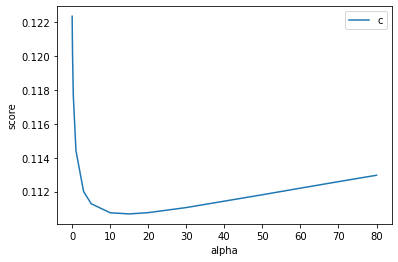

In [27]:
#ridge를 해보자

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

#cv_rmse 함수는 cross_val_score 를 함수화한 것
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, one_hot_encoding_train, y_reg, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

#pipeline을 만들어서 좀 더 유연하고 빠르게, 그리고 동시에 여러 모델을 만듬
def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(one_hot_encoding_train, y_reg)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

In [28]:
#ridge를 좀 더 구체적으로 

alphas_alt = [9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1,10.2]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(one_hot_encoding_train, y_reg)

print("Best of alpha in ridge model :" ,ridge_model2.steps[1][1].alpha_)


print("Ridge rmse : ",cv_rmse(ridge_model2))
print("Ridge rmse : ",cv_rmse(ridge_model2).mean())

#cv_rmse 결과 평균 0.1107 정도의 값을 얻었다. 달러로 환산시 대략 19000~20000 달러 정도 예상

Best of alpha in ridge model : 10.2
Ridge rmse :  [0.11497341 0.11974299 0.11014808 0.11030062 0.09857466]
Ridge rmse :  0.11074795102804616


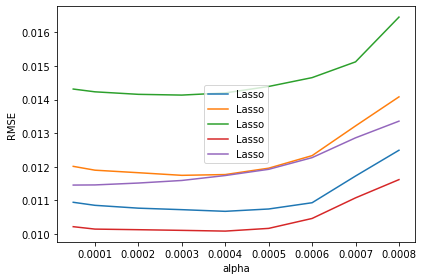

In [29]:
#Lasso에 대한 것

from sklearn.linear_model import LassoCV

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e5,
                                    alphas = alphas2,
                                    random_state = 42)).fit(one_hot_encoding_train, y_reg)
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [30]:
print("Best of alpha in lasso model :",lasso_model2.steps[1][1].alpha_)

print("lasso rmse : ",cv_rmse(lasso_model2))
print("lasso rmse : ",cv_rmse(lasso_model2).mean())

#cv_rmse 결과 평균 0.11046 정도의 값을 얻었다. 달러로 환산시 대략 19000~20000 달러 정도 예상

Best of alpha in lasso model : 0.0005
lasso rmse :  [0.11342538 0.11869368 0.11134618 0.10677976 0.1009369 ]
lasso rmse :  0.11023637936888117


In [31]:
#전체의 결과를 포괄적으로 얘기한 것, CV 결과는 아니니 너무 신뢰하지는 말자

y_train_error_ridge = ridge_model2.predict(one_hot_encoding_train)

rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_error_ridge))))

print("train_RMSE(달러화)_on_RIDGE is {}".format(rmse))

rmse=(np.sqrt(mean_squared_error(y_reg, y_train_error_ridge)))

print("train_RMSE_on_RIDGE is {}".format(rmse))

y_train_error_lasso = lasso_model2.predict(one_hot_encoding_train)

rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_error_lasso))))

print("train_RMSE(달러화)_on_LASSO is {}".format(rmse))

rmse=(np.sqrt(mean_squared_error(y_reg, y_train_error_lasso)))

print("train_RMSE_on_LASSO is {}".format(rmse))


train_RMSE(달러화)_on_RIDGE is 17030.553184452372
train_RMSE_on_RIDGE is 0.09384135447374367
train_RMSE(달러화)_on_LASSO is 17844.838145824164
train_RMSE_on_LASSO is 0.09760373955237446


In [32]:
#ElasticNet

from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e5, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(one_hot_encoding_train, y_reg)


print("Best of alpha in elastic_net :",elastic_model3.steps[1][1].alpha_)

print("Best of ratio in elastic_net :",elastic_model3.steps[1][1].l1_ratio_)



Best of alpha in elastic_net : 0.0005
Best of ratio in elastic_net : 0.85


In [33]:
y_train_error_elasticNET = elastic_model3.predict(one_hot_encoding_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_error_elasticNET))))
print("train_RMSE_for_ElasticNET is {}".format(rmse))

print("lasso rmse : ",cv_rmse(elastic_model3))
print("lasso rmse : ",cv_rmse(elastic_model3).mean())

#cv_rmse 결과 평균 0.110675 정도의 값을 얻었다. 달러로 환산시 대략 19000~20000 달러 정도 예상

train_RMSE_for_ElasticNET is 17693.78818415392
lasso rmse :  [0.11339497 0.11865004 0.11101318 0.10889332 0.10142731]
lasso rmse :  0.11067576177717602


In [34]:
# 우리가 정리한 train set를 다시 70%는 학습용 데이터로, 나머지 30%는 검증용 데이터로 나눈다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(one_hot_encoding_train, y_reg, test_size = .30, random_state=0)

In [35]:
# RandomForestRegressor 모델 만들어보기~
from sklearn.ensemble import RandomForestRegressor

# 객채 생성하기.
rfModel = RandomForestRegressor(n_estimators=300)

# 모델 만들기.
rfModel.fit(x_train, y_train)

y_train_rf = rfModel.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_rf))))
print("train_RMSE_for_RandomForestRegressor is {}".format(rmse))



y_test_rf = rfModel.predict(x_test)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_rf))))
print("test_RMSE_for_RandomForestRegressor is {}".format(rmse))


print("RandomForestRegressor rmse : ",cv_rmse(rfModel))
print("RandomForestRegressor rmse mean : ",cv_rmse(rfModel).mean())

train_RMSE_for_RandomForestRegressor is 10012.015156663458
test_RMSE_for_RandomForestRegressor is 26354.146789948816
RandomForestRegressor rmse :  [0.1403696  0.13664282 0.13916621 0.14018106 0.1292584 ]
RandomForestRegressor rmse mean :  0.13690460373617946


In [36]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
rfModel.fit(one_hot_encoding_train, y_reg)

y_train_rf = rfModel.predict(one_hot_encoding_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_rf))))
print("train_RMSE_for_RandomForestRegressor is {}".format(rmse))

cv_rmse(rfModel)
print("RandomForestRegressor rmse : ",cv_rmse(rfModel))
print("RandomForestRegressor rmse mean : ",cv_rmse(rfModel).mean())

train_RMSE_for_RandomForestRegressor is 9639.452399650045
RandomForestRegressor rmse :  [0.13919245 0.13838746 0.13808244 0.14163974 0.13033907]
RandomForestRegressor rmse mean :  0.13767421854441447


In [37]:
# https://brunch.co.kr/@snobberys/137 참조

# XGBoost

import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb = xgb.fit(one_hot_encoding_train, y_reg)
y_train_xgb = rfModel.predict(one_hot_encoding_train)

rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_xgb))))
print("train_RMSE_for_RandomForestRegressor is {}".format(rmse))

print("Xgboost model rmse : ",cv_rmse(xgb))
print("Xgboost model rmse : ",cv_rmse(xgb).mean())

[10:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
train_RMSE_for_RandomForestRegressor is 9639.452399650045
[10:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:14] WARNING: C:/Users/Administrator/workspace/xgbo

In [38]:
#GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=500, alpha=0.05);

gbm.fit(one_hot_encoding_train, y_reg)

y_train_gbm = gbm.predict(one_hot_encoding_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_reg), np.expm1(y_train_gbm))))

print("train_RMSE_for_gbm is {}".format(rmse))

print("GBM model rmse : ",cv_rmse(gbm))
print("GBM model rmse : ",cv_rmse(gbm).mean())

train_RMSE_for_gbm is 6709.21566002609
GBM model rmse :  [0.12554042 0.12346953 0.12771793 0.12772302 0.10500249]
GBM model rmse :  0.12146157126779429


In [39]:
#모델 체크
from sklearn.linear_model import ElasticNet
ridge_model = Ridge(alpha=14.2).fit(x_train,y_train)
lasso_model = Lasso(alpha=0.00044).fit(x_train,y_train)
elastic_model = ElasticNet(alpha=0.0005, l1_ratio=0.85).fit(x_train,y_train)

y_train_error_ridge = ridge_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error_ridge))))
print("Train_RMSE_on_ridge(in dollar)      : {}".format(rmse))

y_train_error_lasso = lasso_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error_lasso))))
print("Train_RMSE_on_lasso(in dollar)      : {}".format(rmse))

y_train_error_elasticNET = elastic_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error_elasticNET))))
print("Train_RMSE_for_ElasticNET(in dollar) : {}".format(rmse))

# RMSE 계산할 때 np.expm1을 빼본다.
y_train_error_ridge = ridge_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_error_ridge)))
print("Train_RMSE_ridge                     : {}".format(rmse))

y_train_error_lasso = lasso_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_error_lasso)))
print("Train_RMSE_lasso                     : {}".format(rmse))

y_train_error_elasticNET = elastic_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_error_elasticNET)))
print("Train_RMSE_for_ElasticNET            : {}".format(rmse))

#CV 체크
print("CV_RMSE_on_Ridge                     : {}".format(cv_rmse(ridge_model)))
print("CV_Mean_Ridge                        : {}".format(cv_rmse(ridge_model).mean()))
print("CV_RMSE_on_Lasso                     : {}".format(cv_rmse(lasso_model)))
print("CV_Mean_Lasso                        : {}".format(cv_rmse(lasso_model).mean()))
print("CV_RMSE_on_Ridge                     : {}".format(cv_rmse(elastic_model)))
print("CV_Mean_ElasticNet                   : {}".format(cv_rmse(elastic_model).mean()))

Train_RMSE_on_ridge(in dollar)      : 16571.028013059917
Train_RMSE_on_lasso(in dollar)      : 16817.798862689317
Train_RMSE_for_ElasticNET(in dollar) : 16778.277705714627
Train_RMSE_ridge                     : 0.0932895738562499
Train_RMSE_lasso                     : 0.09356392857147883
Train_RMSE_for_ElasticNET            : 0.09334608771364848
CV_RMSE_on_Ridge                     : [0.11578799 0.1211666  0.11072268 0.11295069 0.09909309]
CV_Mean_Ridge                        : 0.11194421024380286
CV_RMSE_on_Lasso                     : [0.11244216 0.11987108 0.11122861 0.1073538  0.10222939]
CV_Mean_Lasso                        : 0.11062500634994574
CV_RMSE_on_Ridge                     : [0.112456   0.11990688 0.1111497  0.10731516 0.10215909]
CV_Mean_ElasticNet                   : 0.1105973643880626


In [40]:
train_ridge_preds = ridge_model.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds])))

model = Ridge(alpha=14.2)

stack_fit = model.fit(stackX, y_reg)

test_ridge_preds = ridge_model.predict(one_hot_encoding_test)
test_lasso_preds = lasso_model.predict(one_hot_encoding_test)
test_elastic_preds = elastic_model.predict(one_hot_encoding_test)

test_stackX = pd.DataFrame(np.transpose(np.array([test_ridge_preds,test_lasso_preds,test_elastic_preds])))
stack_pred = np.expm1(stack_fit.predict(test_stackX))
submission = pd.DataFrame({'Id': Id, 'SalePrice': stack_pred})
submission.to_csv('Ridge_stacking.csv', index=False)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(stackX, y_reg, test_size = .30, random_state=0)

y_train_error = stack_fit.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error))))
print("stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_train, y_train_error)))
print("stack... is {}".format(rmse))

y_test_error = stack_fit.predict(x_test)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_error))))
print("test stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_test, y_test_error)))
print("test stack... is {}".format(rmse))

stack... is 16832.84533779769
stack... is 0.09309578460599839
test stack... is 20233.42491668652
test stack... is 0.10903910478806733


In [42]:
train_ridge_preds = ridge_model.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds])))

model = Lasso(alpha=0.00044)

stack_fit = model.fit(stackX, y_reg)

test_ridge_preds = ridge_model.predict(one_hot_encoding_test)
test_lasso_preds = lasso_model.predict(one_hot_encoding_test)
test_elastic_preds = elastic_model.predict(one_hot_encoding_test)

test_stackX = pd.DataFrame(np.transpose(np.array([test_ridge_preds,test_lasso_preds,test_elastic_preds])))
stack_pred = np.expm1(stack_fit.predict(test_stackX))
submission = pd.DataFrame({'Id': Id, 'SalePrice': stack_pred})
submission.to_csv('lasso_stacking.csv', index=False)

In [43]:
y_train_error = stack_fit.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error))))
print("stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_train, y_train_error)))
print("stack... is {}".format(rmse))

y_test_error = stack_fit.predict(x_test)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_error))))
print("test stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_test, y_test_error)))
print("test stack... is {}".format(rmse))

stack... is 16557.433932143682
stack... is 0.0928332302333288
test stack... is 20029.308818974205
test stack... is 0.10856830877237296


In [44]:
train_ridge_preds = ridge_model.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds])))

model = ElasticNet(alpha=0.0005, l1_ratio = 0.85)

stack_fit = model.fit(stackX, y_reg)

test_ridge_preds = ridge_model.predict(one_hot_encoding_test)
test_lasso_preds = lasso_model.predict(one_hot_encoding_test)
test_elastic_preds = elastic_model.predict(one_hot_encoding_test)

test_stackX = pd.DataFrame(np.transpose(np.array([test_ridge_preds,test_lasso_preds,test_elastic_preds])))
stack_pred = np.expm1(stack_fit.predict(test_stackX))
submission = pd.DataFrame({'Id': Id, 'SalePrice': stack_pred})
submission.to_csv('ElasticNet_stacking.csv', index=False)

In [45]:
y_train_error = stack_fit.predict(x_train)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_error))))
print("stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_train, y_train_error)))
print("stack... is {}".format(rmse))

y_test_final = stack_fit.predict(x_test)
rmse=(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_error))))
print("test stack... is {}".format(rmse))


rmse=(np.sqrt(mean_squared_error(y_test, y_test_error)))
print("test stack... is {}".format(rmse))

stack... is 16566.12989623692
stack... is 0.09284003412940982
test stack... is 20029.308818974205
test stack... is 0.10856830877237296


In [46]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

NameError: name 'test_ID' is not defined